In [1]:
import pandas as pd
import numpy as np
import json

In [2]:
file_path = './json_data/'
file_names = ['australian_user_reviews', 'australian_users_items', 'bundle_data', 'steam_games']

## Read json file into dataframe

In [137]:
df_dict = {}
for name in file_names:
    df_dict[name] = pd.read_json(file_path+name+'_fixed.json')
#     df_dict[name].to_csv(file_path+name+'.csv', index = False)

In [6]:
user_reviews = df_dict['australian_user_reviews']
user_reviews

,user_id,user_url,reviews
0,76561197970982479,http://steamcommunity.com/profiles/76561197970...,"[{'funny': '', 'posted': 'Posted November 5, 2..."
1,js41637,http://steamcommunity.com/id/js41637,"[{'funny': '', 'posted': 'Posted June 24, 2014..."
2,evcentric,http://steamcommunity.com/id/evcentric,"[{'funny': '', 'posted': 'Posted February 3.',..."
3,doctr,http://steamcommunity.com/id/doctr,"[{'funny': '', 'posted': 'Posted October 14, 2..."
4,maplemage,http://steamcommunity.com/id/maplemage,"[{'funny': '3 people found this review funny',..."
...,...,...,...
25794,76561198306599751,http://steamcommunity.com/profiles/76561198306...,"[{'funny': '', 'posted': 'Posted May 31.', 'la..."
25795,Ghoustik,http://steamcommunity.com/id/Ghoustik,"[{'funny': '', 'posted': 'Posted June 17.', 'l..."
25796,76561198310819422,http://steamcommunity.com/profiles/76561198310...,"[{'funny': '1 person found this review funny',..."
25797,76561198312638244,http://steamcommunity.com/profiles/76561198312...,"[{'funny': '', 'posted': 'Posted July 21.', 'l..."


In [7]:
user_items = df_dict['australian_users_items']
user_items

,user_id,items_count,steam_id,user_url,items
0,76561197970982479,277,76561197970982480,http://steamcommunity.com/profiles/76561197970...,"[{'item_id': '10', 'item_name': 'Counter-Strik..."
1,js41637,888,76561198035864384,http://steamcommunity.com/id/js41637,"[{'item_id': '10', 'item_name': 'Counter-Strik..."
2,evcentric,137,76561198007712560,http://steamcommunity.com/id/evcentric,"[{'item_id': '1200', 'item_name': 'Red Orchest..."
3,Riot-Punch,328,76561197963445856,http://steamcommunity.com/id/Riot-Punch,"[{'item_id': '10', 'item_name': 'Counter-Strik..."
4,doctr,541,76561198002099488,http://steamcommunity.com/id/doctr,"[{'item_id': '300', 'item_name': 'Day of Defea..."
...,...,...,...,...,...
88305,76561198323066619,22,76561198323066624,http://steamcommunity.com/profiles/76561198323...,"[{'item_id': '413850', 'item_name': 'CS:GO Pla..."
88306,76561198326700687,177,76561198326700688,http://steamcommunity.com/profiles/76561198326...,"[{'item_id': '11020', 'item_name': 'TrackMania..."
88307,XxLaughingJackClown77xX,0,76561198328759264,http://steamcommunity.com/id/XxLaughingJackClo...,[]
88308,76561198329548331,7,76561198329548336,http://steamcommunity.com/profiles/76561198329...,"[{'item_id': '304930', 'item_name': 'Unturned'..."


In [8]:
user_has_items = user_items[user_items.items_count>0]

In [9]:
user_has_items.items_count.describe()

count    71504.000000
mean        72.068821
std        132.242355
min          1.000000
25%         14.000000
50%         40.000000
75%         88.000000
max       7762.000000
Name: items_count, dtype: float64

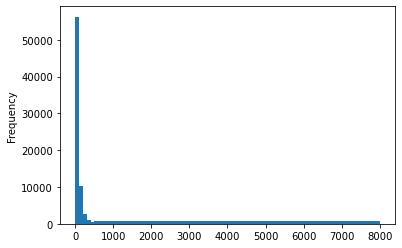

In [10]:
user_has_items.items_count.plot(kind='hist', bins=[0,100,8000])

In [12]:
with open(file_path+'australian_users_items'+'_fixed.json') as f:
    df_items = json.load(f)   
user_items_df = pd.json_normalize(data=df_items, 
                              record_path='items',
                              meta=['items_count','steam_id','user_id','user_url'])

In [219]:
user_items_df

NameError: name 'user_items_df' is not defined

In [14]:
user_items_df.to_csv("user_item.csv", index=False)

In [15]:
pd.read_csv("user_item.csv")

,item_id,item_name,playtime_forever,playtime_2weeks,items_count,steam_id,user_id,user_url
0,10,Counter-Strike,6,0,277,76561197970982479,76561197970982479,http://steamcommunity.com/profiles/76561197970...
1,20,Team Fortress Classic,0,0,277,76561197970982479,76561197970982479,http://steamcommunity.com/profiles/76561197970...
2,30,Day of Defeat,7,0,277,76561197970982479,76561197970982479,http://steamcommunity.com/profiles/76561197970...
3,40,Deathmatch Classic,0,0,277,76561197970982479,76561197970982479,http://steamcommunity.com/profiles/76561197970...
4,50,Half-Life: Opposing Force,0,0,277,76561197970982479,76561197970982479,http://steamcommunity.com/profiles/76561197970...
...,...,...,...,...,...,...,...,...
5153204,346330,BrainBread 2,0,0,7,76561198329548331,76561198329548331,http://steamcommunity.com/profiles/76561198329...
5153205,373330,All Is Dust,0,0,7,76561198329548331,76561198329548331,http://steamcommunity.com/profiles/76561198329...
5153206,388490,One Way To Die: Steam Edition,3,3,7,76561198329548331,76561198329548331,http://steamcommunity.com/profiles/76561198329...
5153207,521570,You Have 10 Seconds 2,4,4,7,76561198329548331,76561198329548331,http://steamcommunity.com/profiles/76561198329...


### Clean steam games metadata

In [195]:
games_metadata = df_dict['steam_games']

In [205]:
games_metadata.shape

(32131, 16)

In [203]:
games_metadata = games_metadata.dropna(subset=["id", "app_name"])

In [204]:
games_metadata = games_metadata.drop_duplicates(["id"])

In [212]:
games_metadata.price

0        4.99
1        0.00
2        0.00
3        0.99
4        2.99
         ... 
32130    1.99
32131    4.99
32132    1.99
32133    4.99
32134    4.99
Name: price, Length: 32131, dtype: float64

In [208]:
free_or_demo = games_metadata['price'].astype(str).str.contains("Free|free|Demo|demo")

In [209]:
games_metadata.loc[free_or_demo, 'price'] = 0

In [211]:
games_metadata.loc[:,'price'] = pd.to_numeric(games_metadata.price, errors='coerce') 

### Bundle data: create item-bundle mapping and add to games metadata

In [21]:
bundle_data = df_dict['bundle_data']

In [60]:
bundle_data[bundle_data.bundle_name.duplicated(keep=False)]

,bundle_final_price,bundle_url,bundle_price,bundle_name,bundle_id,items,bundle_discount
137,$2.47,http://store.steampowered.com/bundle/501/?utm_...,$18.96,Puzzle Bundle,501,"[{'genre': 'Action, Adventure, Casual, Indie, ...",87%
405,$3.57,http://store.steampowered.com/bundle/724/?utm_...,$5.97,Puzzle Bundle,724,"[{'genre': 'Casual, Indie', 'item_id': '348340...",40%


In [25]:
list(bundle_data.columns)

['bundle_final_price',
 'bundle_url',
 'bundle_price',
 'bundle_name',
 'bundle_id',
 'items',
 'bundle_discount']

In [27]:
with open(file_path+'bundle_data'+'_fixed.json') as f:
    df_items = json.load(f)   
    bundle_df = pd.json_normalize(data=df_items, 
                              record_path='items',
                              meta=['bundle_final_price', 'bundle_url', 'bundle_price', 'bundle_name', 'bundle_id', 'bundle_discount'])

In [87]:
bundle_df.shape

(3500, 11)

In [54]:
bundle_df.drop_duplicates(subset=["item_id", "bundle_id"], inplace=True)

In [72]:
# convert item id to float(item id is integer, coerce includes nan as float) which is corresponding to the item id in games metadata
bundle_df.item_id = pd.to_numeric(bundle_df.item_id, errors='coerce') 

In [83]:
bundle_df.dropna(subset=["item_id"], inplace=True)

In [86]:
bundle_df.item_id = bundle_df.item_id.astype(int)
bundle_df

,genre,item_id,discounted_price,item_url,item_name,bundle_final_price,bundle_url,bundle_price,bundle_name,bundle_id,bundle_discount
0,"Adventure, Indie, RPG",326950,$8.99,http://store.steampowered.com/app/326950,Sword of Asumi,$66.46,http://store.steampowered.com/bundle/450/?utm_...,$73.86,Dharker Studio 2015 Complete,450,10%
1,"Adventure, Indie, RPG",331490,$2.99,http://store.steampowered.com/app/331490,Sword of Asumi - Soundtrack,$66.46,http://store.steampowered.com/bundle/450/?utm_...,$73.86,Dharker Studio 2015 Complete,450,10%
2,"Adventure, Indie, RPG",331491,$1.99,http://store.steampowered.com/app/331491,Sword of Asumi - Graphic Novel,$66.46,http://store.steampowered.com/bundle/450/?utm_...,$73.86,Dharker Studio 2015 Complete,450,10%
3,"Adventure, Indie, RPG",331492,$0.99,http://store.steampowered.com/app/331492,Sword of Asumi - Character Creator,$66.46,http://store.steampowered.com/bundle/450/?utm_...,$73.86,Dharker Studio 2015 Complete,450,10%
4,"Adventure, Casual, Indie",348540,$12.99,http://store.steampowered.com/app/348540,Divine Slice of Life,$66.46,http://store.steampowered.com/bundle/450/?utm_...,$73.86,Dharker Studio 2015 Complete,450,10%
...,...,...,...,...,...,...,...,...,...,...,...
3520,"Action, Adventure, Casual, Indie",467220,$4.99,http://store.steampowered.com/app/467220,Dyna Bomb,$5.58,http://store.steampowered.com/bundle/588/?utm_...,$6.98,Dyna Bomb - Game + OST Pack #1,588,20%
3521,"Action, Adventure, Casual, Indie",485090,$1.99,http://store.steampowered.com/app/485090,Dyna Bomb - Soundtrack OST,$5.58,http://store.steampowered.com/bundle/588/?utm_...,$6.98,Dyna Bomb - Game + OST Pack #1,588,20%
3522,"Action, Adventure, Indie",385230,$1.99,http://store.steampowered.com/app/385230,Ninjahtic,$4.77,http://store.steampowered.com/bundle/594/?utm_...,$5.97,The Ninjahtic Series,594,20%
3523,"Action, Adventure, Indie",387880,$1.99,http://store.steampowered.com/app/387880,Ninjahtic Mind Tricks,$4.77,http://store.steampowered.com/bundle/594/?utm_...,$5.97,The Ninjahtic Series,594,20%


In [94]:
item_bundle_df = bundle_df[["item_id", "bundle_name"]].groupby('item_id')['bundle_name'].apply(list).reset_index(name='bundles')

In [122]:
item_bundle_df

,item_id,bundles
0,20,"[Half-Life Complete, Valve Complete Pack, Half..."
1,30,"[Valve Complete Pack, Counter-Strike 1 Anthology]"
2,40,"[Valve Complete Pack, Counter-Strike 1 Anthology]"
3,50,"[Half-Life Complete, Valve Complete Pack, Half..."
4,60,"[Valve Complete Pack, Counter-Strike 1 Anthology]"
...,...,...
2782,528389,"[Naruto Shippuden Uncut Season 4, Vol. 4]"
2783,528390,"[Naruto Shippuden Uncut Season 4, Vol. 4]"
2784,528391,"[Naruto Shippuden Uncut Season 4, Vol. 4]"
2785,528392,"[Naruto Shippuden Uncut Season 4, Vol. 4]"


In [214]:
games_metadata = games_metadata.merge(item_bundle_df, how='left', left_on='id', right_on='item_id')

In [217]:
games_metadata

,publisher,genres,app_name,title,url,release_date,tags,discount_price,reviews_url,specs,price,early_access,id,developer,sentiment,metascore,item_id,bundles
0,Kotoshiro,"[Action, Casual, Indie, Simulation, Strategy]",Lost Summoner Kitty,Lost Summoner Kitty,http://store.steampowered.com/app/761140/Lost_...,2018-01-04,"[Strategy, Action, Indie, Casual, Simulation]",4.49,http://steamcommunity.com/app/761140/reviews/?...,[Single-player],4.99,False,761140.0,Kotoshiro,NaN,NaN,NaN,NaN
1,"Making Fun, Inc.","[Free to Play, Indie, RPG, Strategy]",Ironbound,Ironbound,http://store.steampowered.com/app/643980/Ironb...,2018-01-04,"[Free to Play, Strategy, Indie, RPG, Card Game...",NaN,http://steamcommunity.com/app/643980/reviews/?...,"[Single-player, Multi-player, Online Multi-Pla...",0.00,False,643980.0,Secret Level SRL,Mostly Positive,NaN,NaN,NaN
2,Poolians.com,"[Casual, Free to Play, Indie, Simulation, Sports]",Real Pool 3D - Poolians,Real Pool 3D - Poolians,http://store.steampowered.com/app/670290/Real_...,2017-07-24,"[Free to Play, Simulation, Sports, Casual, Ind...",NaN,http://steamcommunity.com/app/670290/reviews/?...,"[Single-player, Multi-player, Online Multi-Pla...",0.00,False,670290.0,Poolians.com,Mostly Positive,NaN,NaN,NaN
3,彼岸领域,"[Action, Adventure, Casual]",弹炸人2222,弹炸人2222,http://store.steampowered.com/app/767400/2222/,2017-12-07,"[Action, Adventure, Casual]",0.83,http://steamcommunity.com/app/767400/reviews/?...,[Single-player],0.99,False,767400.0,彼岸领域,NaN,NaN,NaN,NaN
4,NaN,NaN,Log Challenge,NaN,http://store.steampowered.com/app/773570/Log_C...,NaN,"[Action, Indie, Casual, Sports]",1.79,http://steamcommunity.com/app/773570/reviews/?...,"[Single-player, Full controller support, HTC V...",2.99,False,773570.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32126,Ghost_RUS Games,"[Casual, Indie, Simulation, Strategy]",Colony On Mars,Colony On Mars,http://store.steampowered.com/app/773640/Colon...,2018-01-04,"[Strategy, Indie, Casual, Simulation]",1.49,http://steamcommunity.com/app/773640/reviews/?...,"[Single-player, Steam Achievements]",1.99,False,773640.0,"Nikita ""Ghost_RUS""",NaN,NaN,NaN,NaN
32127,Sacada,"[Casual, Indie, Strategy]",LOGistICAL: South Africa,LOGistICAL: South Africa,http://store.steampowered.com/app/733530/LOGis...,2018-01-04,"[Strategy, Indie, Casual]",4.24,http://steamcommunity.com/app/733530/reviews/?...,"[Single-player, Steam Achievements, Steam Clou...",4.99,False,733530.0,Sacada,NaN,NaN,NaN,NaN
32128,Laush Studio,"[Indie, Racing, Simulation]",Russian Roads,Russian Roads,http://store.steampowered.com/app/610660/Russi...,2018-01-04,"[Indie, Simulation, Racing]",1.39,http://steamcommunity.com/app/610660/reviews/?...,"[Single-player, Steam Achievements, Steam Trad...",1.99,False,610660.0,Laush Dmitriy Sergeevich,NaN,NaN,NaN,NaN
32129,SIXNAILS,"[Casual, Indie]",EXIT 2 - Directions,EXIT 2 - Directions,http://store.steampowered.com/app/658870/EXIT_...,2017-09-02,"[Indie, Casual, Puzzle, Singleplayer, Atmosphe...",NaN,http://steamcommunity.com/app/658870/reviews/?...,"[Single-player, Steam Achievements, Steam Cloud]",4.99,False,658870.0,"xropi,stev3ns",1 user reviews,NaN,NaN,NaN


In [97]:
item_bundle_df.to_csv("item_bundles.csv", index=False)

In [218]:
games_metadata.to_csv("games_metadata.csv", index=False)

### Create a full list of games id to name pair for games in both user-items and games metadata

In [46]:
all_games = pd.read_csv("all_games_id_name_pair.csv")

In [71]:
all_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33917 entries, 0 to 33916
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   item_id    33917 non-null  float64
 1   item_name  33917 non-null  object 
dtypes: float64(1), object(1)
memory usage: 530.1+ KB
